In [5]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, ADASYN


from sklearn.preprocessing import StandardScaler, Imputer
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pd.options.display.max_columns = 999

In [7]:
rides = pd.read_pickle("Cleaned Data/rides_hoods.pkl")

In [8]:
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_gender,hours,distance,mph,DATE,begin_time,stop_time,DAILYSunrise,DAILYSunset,Sunrise,Sunset,after_dark,male_dummy,Rain,HOURLYWindSpeed,Temp,age,start_cluster_latitude,start_cluster_longitude,end_cluster_latitude,end_cluster_longitude,end_cluster_0,end_cluster_1,end_cluster_2,end_cluster_3,end_cluster_4,end_cluster_5,end_cluster_6,end_cluster_7,end_cluster_8,end_cluster_9,end_cluster_10,end_cluster_11,end_cluster_12,end_cluster_13,end_cluster_14,end_cluster_15,end_cluster_16,end_cluster_17,end_cluster_18,end_cluster_19,end_cluster_20,end_cluster_21,end_cluster_22,end_cluster_23,end_cluster_24,end_cluster_25,end_cluster_26,end_cluster_27,end_cluster_28,end_cluster_29,end_cluster_30,end_cluster_31,end_cluster_32,end_cluster_33,end_cluster_34,end_cluster_35,end_cluster_36,end_cluster_37,end_cluster_38,end_cluster_39,end_cluster_40,end_cluster_41,end_cluster_42,end_cluster_43,end_cluster_44,end_cluster_45,end_cluster_46,end_cluster_47,end_cluster_48,end_cluster_49,end_cluster_50,end_cluster_51,end_cluster_52,end_cluster_53,end_cluster_54,end_cluster_55,end_cluster_56,end_cluster_57,end_cluster_58,end_cluster_59,end_cluster_60,end_cluster_61,start_cluster_0,start_cluster_1,start_cluster_2,start_cluster_3,start_cluster_4,start_cluster_5,start_cluster_6,start_cluster_7,start_cluster_8,start_cluster_9,start_cluster_10,start_cluster_11,start_cluster_12,start_cluster_13,start_cluster_14,start_cluster_15,start_cluster_16,start_cluster_17,start_cluster_18,start_cluster_19,start_cluster_20,start_cluster_21,start_cluster_22,start_cluster_23,start_cluster_24,start_cluster_25,start_cluster_26,start_cluster_27,start_cluster_28,start_cluster_29,start_cluster_30,start_cluster_31,start_cluster_32,start_cluster_33,start_cluster_34,start_cluster_35,start_cluster_36,start_cluster_37,start_cluster_38,start_cluster_39,start_cluster_40,start_cluster_41,start_cluster_42,start_cluster_43,start_cluster_44,start_cluster_45,start_cluster_46,start_cluster_47,start_cluster_48,start_cluster_49,start_cluster_50,start_cluster_51,start_cluster_52,start_cluster_53,start_cluster_54,start_cluster_55,start_cluster_56,start_cluster_57,start_cluster_58,start_cluster_59,start_cluster_60,start_cluster_61,user_type_Customer,user_type_Subscriber,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,start_Anza Vista,start_Downtown / Union Square,start_Tenderloin,start_Civic Center,start_Hayes Valley,start_Alamo Square,start_Panhandle,start_Lower Haight,start_Duboce Triangle,start_Rincon Hill,start_South Beach,start_South of Market,start_Showplace Square,start_Mission Bay,start_Mission Dolores,start_Castro,start_Dolores Heights,start_Mission,start_Potrero Hill,start_Dogpatch,start_Northern Waterfront,start_Bernal Heights,start_Noe Valley,start_Japantown,start_Western Addition,start_Chinatown,start_North Beach,start_Financial District,end_Anza Vista,end_Downtown / Union Square,end_Tenderloin,end_Civic Center,end_Hayes Valley,end_Alamo Square,end_Panhandle,end_Lower Haight,end_Duboce Triangle,end_Rincon Hill,end_South Beach,end_South of Market,end_Showplace Square,end_Mission Bay,end_Mission Dolores,end_Castro,end_Dolores Heights,end_Mission,end_Potrero Hill,end_Dogpatch,end_Northern Waterfront,end_Bernal Heights,end_Noe Valley,end_Japantown,end_Western Addition,end_Chinatown,end_North Beach,end_Financial District
0,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,1990.0,Male,0

In [9]:
#Subset to just certain columns
colsToDrop = ['start_station_id','start_station_latitude','start_station_longitude',
              'start_station_name','end_station_name',
            'end_station_longitude', 'DATE',
            'start_time','duration_sec','end_time','bike_id','weekday_0','hour_0',
            'start_cluster_0','end_cluster_0',
            'month_6','stop_time','begin_time',
            'member_gender','member_birth_year',
            'start_station_latitude','end_station_latitude','end_station_id',
            'user_type_Customer','hours','DAILYSunrise',
            'DAILYSunset','Sunrise','Sunset','male_dummy','end_cluster_latitude',
            'end_cluster_longitude','start_cluster_latitude','start_cluster_longitude']



X = rides.drop(colsToDrop,axis=1)

y = rides['male_dummy']

In [10]:
X.head()

,distance,mph,after_dark,Rain,HOURLYWindSpeed,Temp,age,end_cluster_1,end_cluster_2,end_cluster_3,end_cluster_4,end_cluster_5,end_cluster_6,end_cluster_7,end_cluster_8,end_cluster_9,end_cluster_10,end_cluster_11,end_cluster_12,end_cluster_13,end_cluster_14,end_cluster_15,end_cluster_16,end_cluster_17,end_cluster_18,end_cluster_19,end_cluster_20,end_cluster_21,end_cluster_22,end_cluster_23,end_cluster_24,end_cluster_25,end_cluster_26,end_cluster_27,end_cluster_28,end_cluster_29,end_cluster_30,end_cluster_31,end_cluster_32,end_cluster_33,end_cluster_34,end_cluster_35,end_cluster_36,end_cluster_37,end_cluster_38,end_cluster_39,end_cluster_40,end_cluster_41,end_cluster_42,end_cluster_43,end_cluster_44,end_cluster_45,end_cluster_46,end_cluster_47,end_cluster_48,end_cluster_49,end_cluster_50,end_cluster_51,end_cluster_52,end_cluster_53,end_cluster_54,end_cluster_55,end_cluster_56,end_cluster_57,end_cluster_58,end_cluster_59,end_cluster_60,end_cluster_61,start_cluster_1,start_cluster_2,start_cluster_3,start_cluster_4,start_cluster_5,start_cluster_6,start_cluster_7,start_cluster_8,start_cluster_9,start_cluster_10,start_cluster_11,start_cluster_12,start_cluster_13,start_cluster_14,start_cluster_15,start_cluster_16,start_cluster_17,start_cluster_18,start_cluster_19,start_cluster_20,start_cluster_21,start_cluster_22,start_cluster_23,start_cluster_24,start_cluster_25,start_cluster_26,start_cluster_27,start_cluster_28,start_cluster_29,start_cluster_30,start_cluster_31,start_cluster_32,start_cluster_33,start_cluster_34,start_cluster_35,start_cluster_36,start_cluster_37,start_cluster_38,start_cluster_39,start_cluster_40,start_cluster_41,start_cluster_42,start_cluster_43,start_cluster_44,start_cluster_45,start_cluster_46,start_cluster_47,start_cluster_48,start_cluster_49,start_cluster_50,start_cluster_51,start_cluster_52,start_cluster_53,start_cluster_54,start_cluster_55,start_cluster_56,start_cluster_57,start_cluster_58,start_cluster_59,start_cluster_60,start_cluster_61,user_type_Subscriber,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,start_Anza Vista,start_Downtown / Union Square,start_Tenderloin,start_Civic Center,start_Hayes Valley,start_Alamo Square,start_Panhandle,start_Lower Haight,start_Duboce Triangle,start_Rincon Hill,start_South Beach,start_South of Market,start_Showplace Square,start_Mission Bay,start_Mission Dolores,start_Castro,start_Dolores Heights,start_Mission,start_Potrero Hill,start_Dogpatch,start_Northern Waterfront,start_Bernal Heights,start_Noe Valley,start_Japantown,start_Western Addition,start_Chinatown,start_North Beach,start_Financial District,end_Anza Vista,end_Downtown / Union Square,end_Tenderloin,end_Civic Center,end_Hayes Valley,end_Alamo Square,end_Panhandle,end_Lower Haight,end_Duboce Triangle,end_Rincon Hill,end_South Beach,end_South of Market,end_Showplace Square,end_Mission Bay,end_Mission Dolores,end_Castro,end_Dolores Heights,end_Mission,end_Potrero Hill,end_Dogpatch,end_Northern Waterfront,end_Bernal Heights,end_Noe Valley,end_Japantown,end_Western Addition,end_Chinatown,end_North Beach,end_Financial District
0,0.942895,1.554934,1,0.0,6.0,53.0,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.942895,1.564249,1,0.0,6.0,53.0,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
#Split into train and test data
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 4444, stratify = y)


In [12]:
# try with dummies for all stations
start_cluster_list = ['start_cluster_'+ str(i) for i in range(1,62)]
end_cluster_list = ['end_cluster_' + str(i) for i in range(1,62)]
colsToDrop = ['start_station_latitude','start_station_longitude',
              'start_station_name','end_station_name',
            'end_station_longitude', 'DATE',
            'start_time','duration_sec','end_time','bike_id','weekday_0','hour_0',
            'start_cluster_0','end_cluster_0',
            'month_6','stop_time','begin_time',
            'member_gender','member_birth_year',
            'start_station_latitude','end_station_latitude',
            'user_type_Customer','hours','DAILYSunrise',
            'DAILYSunset','Sunrise','Sunset','male_dummy','end_cluster_latitude',
            'end_cluster_longitude','start_cluster_latitude','start_cluster_longitude']
colsToDrop = colsToDrop + start_cluster_list + end_cluster_list
X_all_stations = rides.drop(colsToDrop, axis = 1)
X_all_stations = pd.get_dummies(X_all_stations,columns=['start_station_id','end_station_id'])
y_all_stations = rides['male_dummy']

In [13]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all_stations,y_all_stations,test_size = .3, random_state = 4444)

In [14]:
# z score all variables
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_all_train = scale.fit_transform(X_all_train)
X_all_test = scale.transform(X_all_test)

In [15]:
X_all_train.shape

(246505, 343)

In [12]:
# run principle components analysis, cut features in half
pca = PCA(n_components = .2)
X_all_train = pca.fit_transform(X_all_train)
X_all_test = pca.transform(X_all_test)

In [13]:
X_all_train.shape

(246505, 44)

In [14]:
y_all_train.shape

(246505,)

In [15]:
# subset random sample of x and y
smallDF = pd.merge(pd.DataFrame(X_all_train),pd.DataFrame(y_all_train), left_index = True,right_index=True)
smallDF = smallDF.sample(frac=0.2,random_state=200)
print(smallDF.shape)
X_small_train = smallDF.drop('male_dummy',axis=1)
y_small_train = smallDF['male_dummy']
X_small_train.shape

(34509, 45)


(34509, 44)

In [16]:
# attempt SMOTE on training data
X_resampled, y_resampled = SMOTE(ratio='minority', kind='borderline1').fit_sample(X_small_train, y_small_train)

In [17]:
# random forest on SMOTE
rf = RandomForestClassifier(n_estimators=50,max_depth = 80, random_state=42,n_jobs = -1)
rf.fit(X_resampled,y_resampled)
rf.score(X_all_test,y_all_test)

0.71487528988593874

In [18]:
# fit a bunch of baseline models and evaluate if any better than others

def baseline_models(x_train,y_train,x_test,y_test):
    print('baseline accuracy is %s' %np.mean(y_test))
    def model_call(model,model_name):
        model.fit(x_train,y_train)
        print(model_name + ": %s" % model.score(x_test,y_test))
    logit = LogisticRegression()
    model_call(logit,"LogisticRegression")
    GNB = GaussianNB()
    model_call(GNB,"GaussianNB")
    svc = SGDClassifier(loss="hinge")
    model_call(svc,"Support Vector Gradient Descent")
    dt = DecisionTreeClassifier()
    model_call(dt,"Decision Tree")
    rf = RandomForestClassifier(n_estimators = 50, n_jobs = -1)
    model_call(rf,"Random Forest")
    
    
    
    

In [19]:
baseline_models(X_all_train,y_all_train,X_all_test,y_all_test)

baseline accuracy is 0.7934024326754697
LogisticRegression: 0.793194188083
GaussianNB: 0.774622556676


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Support Vector Gradient Descent: 0.786341047849
Decision Tree: 0.724908892991
Random Forest: 0.812295896635


In [20]:
# models worth looking into Logistic? RF?

In [21]:
baseline_models(X_train,y_train,X_test,y_test)

baseline accuracy is 0.7934308296653888
LogisticRegression: 0.790591130673
GaussianNB: 0.685616924606


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Support Vector Gradient Descent: 0.776411567041
Decision Tree: 0.8
Random Forest: 0.837512423683


In [22]:
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
logit = AdaBoostClassifier()
logit.fit(X_train2,y_train)
logit.score(X_test2,y_test)

0.79268304226418662

In [23]:
# deal with class imbalance by trying to get balance in training class

train=rides.sample(frac=0.8,random_state=200)
test=rides.drop(train.index)

y_test_balance = test['male_dummy']
x_test_balance = test.drop(colsToDrop, axis=1)

# drop random subset of males to get class balance in train
train_females = train[train['male_dummy'] == 0]
train_males = train[train['male_dummy'] ==1]



In [24]:
train_males = train_males.sample(n=train_females.shape[0], random_state =200)
train_males.shape

(58353, 198)

In [25]:
x_train_balance = pd.concat([train_males,train_females]).drop(colsToDrop, axis =1)
y_train_balance = pd.concat([train_males,train_females])['male_dummy']

In [26]:
x_train_balance = scale.fit_transform(x_train_balance)
x_test_balance = scale.transform(x_test_balance)


In [27]:
logit = LogisticRegression()
cross_val_score(logit,x_train_balance,y_train_balance)


array([ 0.61166521,  0.61277055,  0.61079122])

In [28]:
np.mean(y_test_balance)

0.7956836575323015

In [29]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, max_depth = 50)
cross_val_score(rf,x_train_balance,y_train_balance)


array([ 0.72158244,  0.72019433,  0.7214025 ])

In [30]:
rf.fit(x_train_balance,y_train_balance)
rf.score(x_test_balance,y_test_balance)

0.71808888257844672

In [31]:
params = {'n_estimators': [250,350]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, params, n_jobs = -1)
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([ 184.56211472,  226.6543595 ]),
 'mean_score_time': array([ 11.30933444,  11.06275034]),
 'mean_test_score': array([ 0.83156528,  0.83115555]),
 'mean_train_score': array([ 0.99988236,  0.99988236]),
 'param_n_estimators': masked_array(data = [250 350],
              mask = [False False],
        fill_value = ?),
 'params': [{'n_estimators': 250}, {'n_estimators': 350}],
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_test_score': array([ 0.83229685,  0.83167618]),
 'split0_train_score': array([ 0.99991481,  0.99991481]),
 'split1_test_score': array([ 0.83118732,  0.83084656]),
 'split1_train_score': array([ 0.99984179,  0.99984179]),
 'split2_test_score': array([ 0.83121166,  0.83094392]),
 'split2_train_score': array([ 0.99989047,  0.99989047]),
 'std_fit_time': array([ 10.29322221,  30.60492103]),
 'std_score_time': array([ 0.3843035 ,  0.63330869]),
 'std_test_score': array([ 0.0005174 ,  0.00037028]),
 'std_train_score': array([  3.03574129e-05,  

In [32]:
rf = RandomForestClassifier(n_estimators=400, max_features='log2',random_state=42,n_jobs = -1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.82885134175777364

In [33]:
rf = RandomForestClassifier(n_estimators=50, max_features='log2',random_state=42,n_jobs = -1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.82887973874769272

In [34]:
rf = RandomForestClassifier(n_estimators=50,max_depth = 50, random_state=42,n_jobs = -1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.83372615836054709

In [35]:
train_scores = []
test_scores = []
depths = []
for i in range(10,100,10):
    rf = RandomForestClassifier(n_estimators=50,max_depth = i, random_state=42,n_jobs = -1)
    rf.fit(X_train,y_train)
    train_scores.append(rf.score(X_train,y_train))
    test_scores.append(rf.score(X_test,y_test))
    depths.append(i)



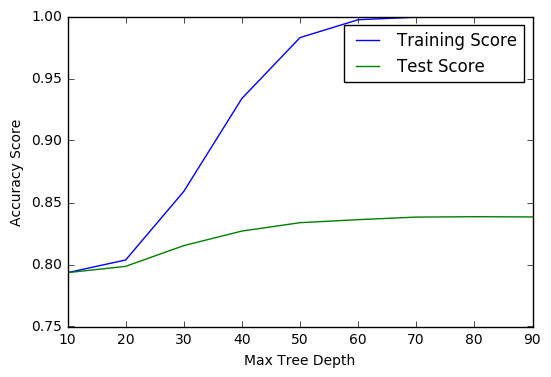

In [36]:
plt.plot(depths,train_scores,label="Training Score")
plt.plot(depths,test_scores, label="Test Score")
plt.legend()
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy Score")

In [37]:
roc_auc_score(y_test,rf.predict(X_test))

0.64066870019283217

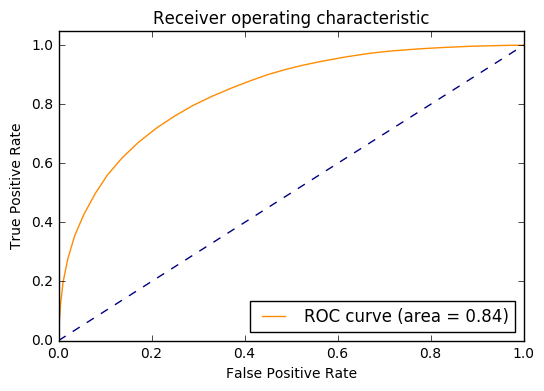

In [38]:
y_score = rf.predict_proba(X_test)[:, 1]
fpr, tpr, threshhold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
      label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
print(sorted(list(zip(X.columns,rf.feature_importances_)),key= lambda x: x[1], reverse = True))

[('mph', 0.13875811732948462), ('age', 0.11795615898380848), ('distance', 0.11097447296607055), ('Temp', 0.070836746708844919), ('HOURLYWindSpeed', 0.064512320992261299), ('month_10', 0.012071579385087922), ('weekday_2', 0.012017980345021424), ('weekday_3', 0.011820527397716054), ('weekday_1', 0.011721577962627927), ('weekday_4', 0.011704526091784013), ('month_9', 0.010868176111546194), ('month_11', 0.010684017355384054), ('month_8', 0.0097114603819438844), ('month_12', 0.0092244240297473159), ('user_type_Subscriber', 0.0088887684457807231), ('after_dark', 0.0086657764900672455), ('hour_17', 0.0082462679776148778), ('end_cluster_17', 0.0079171138303122442), ('hour_18', 0.007297028699148814), ('month_7', 0.0072182741762354631), ('hour_16', 0.0071738465990667999), ('start_cluster_17', 0.0070978602497731224), ('end_cluster_50', 0.0070237595779494991), ('end_cluster_12', 0.0069944113400839045), ('hour_9', 0.0069156273119572904), ('start_cluster_12', 0.0066345033372184658), ('hour_8', 0.006

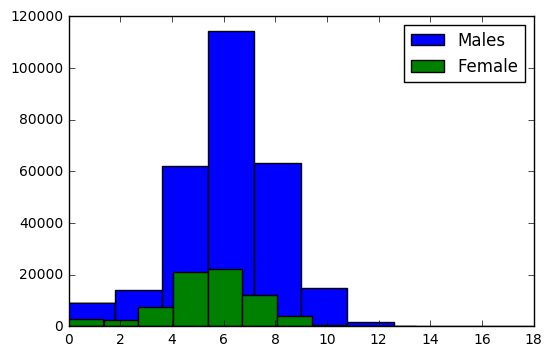

In [49]:
plt.hist(rides[rides['male_dummy']==1]['mph'], label='Males')
plt.hist(rides[rides['male_dummy']==0]['mph'], label='Female')
plt.legend()


In [41]:
rides['weekday'] = np.where((rides['weekday_5'] == 0) & 
                            (rides['weekday_6'] == 0), 1, 0)
new_X = rides[['age','distance','mph','weekday','Temp','HOURLYWindSpeed','after_dark','user_type_Subscriber']]

new_X_train, new_X_test,new_y_train, new_y_test = train_test_split(X,y,test_size = .3, random_state = 4444, stratify = y)


In [42]:

new_X_train = scale.fit_transform(X_train)
new_X_test = scale.transform(X_test)

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=5,n_jobs = -1)
model.fit(new_X_train,new_y_train)
print(np.mean(new_y_test), model.score(new_X_test,new_y_test))


0.7934308296653888 0.837521889346


In [44]:
logit = LogisticRegression()
params = {'C': [.1,1,10,100], 'penalty' : ['l2','l1']}
clf = GridSearchCV(logit, params, n_jobs = -1)
clf.fit(new_X_train,new_y_train)
clf.cv_results_


{'mean_fit_time': array([  17.05648287,  149.71386909,   18.54071418,  260.39363384,
          18.99083575,  248.53075933,   18.6738596 ,  197.67089661]),
 'mean_score_time': array([ 0.08528519,  0.09769471,  0.07097705,  0.03561711,  0.04749004,
         0.0310394 ,  0.06368256,  0.02234117]),
 'mean_test_score': array([ 0.79038153,  0.79046672,  0.79035719,  0.79036936,  0.79035719,
         0.79035719,  0.79035314,  0.79035719]),
 'mean_train_score': array([ 0.7907223 ,  0.79077098,  0.7907081 ,  0.79072433,  0.79070404,
         0.79070404,  0.79070404,  0.79070201]),
 'param_C': masked_array(data = [0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1'],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': [{'C': 0.1, 'penalty': 'l2'},
  {'C': 0.1, 'penalty': 'l1'},
  {'C': 1, 'p

In [52]:
rf = RandomForestClassifier()
params = {'n_estimators': [25,250], 'max_depth' : [5,50],
          'max_features': ['auto','log2']}
clf = GridSearchCV(rf, params, n_jobs = -1)
clf.fit(new_X_train,new_y_train)
clf.cv_results_
clf.best_params_

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 250}

In [46]:
rfs = []
for i in range(5):
    rfs.append((str(i),RandomForestClassifier(n_estimators=50,max_depth = 100, random_state=i,n_jobs = -1)))
    

    
vote = VotingClassifier(estimators=rfs, voting='hard')
vote.fit(X_train,y_train)
vote.score(X_test,y_test)

0.83874295991291592

In [17]:
rf = RandomForestClassifier(n_estimators=250, random_state=5,n_jobs = -1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.845520374840267

In [22]:
print(recall_score(y_test,rf.predict(X_test),pos_label=1))
print(precision_score(y_test,rf.predict(X_test),pos_label=1))

print(recall_score(y_test,rf.predict(X_test),pos_label=0))
print(precision_score(y_test,rf.predict(X_test),pos_label=0))

0.9795161174870559
0.8489990486826322
0.3308436053704807
0.8078773637686024


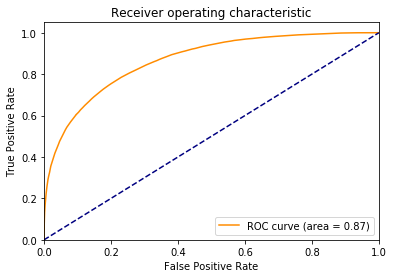

In [20]:
y_score = rf.predict_proba(X_test)[:, 1]
fpr, tpr, threshhold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
      label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('graphics/ROC.png')

In [53]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_test,y_test)

0.79490747314118038

In [ ]:
gbc = GradientBoostingClassifier(max_depth = 20)
gbc.fit(X_train,y_train)
gbc.score(X_test,y_test)